In [15]:
import numpy as np
import matplotlib.pyplot as plt

from nilearn import connectome
from sklearn.covariance import EmpiricalCovariance

# generate data
# dim(x) = number ROI x time points
x = np.random.rand(10, 100)

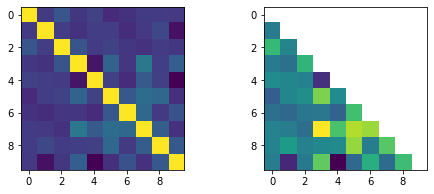

In [16]:
def compute_connectivity(x):
    mean = x.mean(1)
    std = x.std(1, ddof=x.shape[1] - 1)
    cov = np.dot(x, x.T) - (x.shape[1] * np.dot(mean[:, np.newaxis], mean[np.newaxis, :]))
    return cov / np.dot(std[:, np.newaxis], std[np.newaxis, :])

# fcm
fcm = compute_connectivity(x)

# mask fcm for lower triangle values
mask = np.invert(np.tri(fcm.shape[0], k=-1, dtype=bool))
m = np.ma.masked_where(mask == 1, mask)
lower_tri_fcm = np.ma.masked_where(m, fcm)

# plot
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 3))
ax[0].imshow(fcm)
ax[1].imshow(lower_tri_fcm)

# flatten
flat_fcm = lower_tri_fcm.compressed()
assert flat_fcm.size == (fcm.shape[0] * (fcm.shape[0] - 1))*0.5

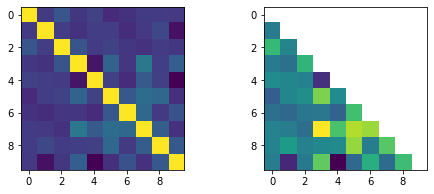

In [19]:
cov_estimator = EmpiricalCovariance(assume_centered=False, store_precision=False)
conn_measure = connectome.ConnectivityMeasure(cov_estimator=cov_estimator, kind='correlation')
flat_conn_measure = connectome.ConnectivityMeasure(cov_estimator=cov_estimator, kind='correlation', vectorize=True, discard_diagonal=True)
    
    
fcm_nilearn = conn_measure.fit_transform([np.transpose(x)])[0]

# mask fcm for lower triangle values
mask = np.invert(np.tri(fcm.shape[0], k=-1, dtype=bool))
m = np.ma.masked_where(mask == 1, mask)
lower_tri_fcm_nilearn = np.ma.masked_where(m, fcm_nilearn)

# plot
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 3))
ax[0].imshow(fcm_nilearn)
ax[1].imshow(lower_tri_fcm_nilearn)

# flatten
flat_fcm_nilearn = flat_conn_measure.fit_transform([np.transpose(x)])[0]

In [21]:
print(flat_fcm)
print(flat_fcm_nilearn)

[ 0.00299843  0.12210021  0.01798702 -0.00358009 -0.02169914  0.11402174
  0.03148132  0.02140973  0.0116009  -0.13264272 -0.05615624  0.02069677
  0.03776086  0.18436555  0.03084252 -0.02192827 -0.0398443  -0.01065307
 -0.00994539 -0.04756745  0.13343779  0.01383404  0.00123894 -0.02672097
  0.2787904   0.14131453  0.22419656  0.2065612   0.01484874  0.06121679
  0.00843613  0.02357982  0.02979187  0.20272534  0.00420957  0.15547289
  0.00168591 -0.14458137 -0.0057672   0.16174265 -0.19864042 -0.03467758
  0.10132395 -0.02914552  0.13010154]
[ 0.00299843  0.12210021  0.01798702 -0.00358009 -0.02169914  0.11402174
  0.03148132  0.02140973  0.0116009  -0.13264272 -0.05615624  0.02069677
  0.03776086  0.18436555  0.03084252 -0.02192827 -0.0398443  -0.01065307
 -0.00994539 -0.04756745  0.13343779  0.01383404  0.00123894 -0.02672097
  0.2787904   0.14131453  0.22419656  0.2065612   0.01484874  0.06121679
  0.00843613  0.02357982  0.02979187  0.20272534  0.00420957  0.15547289
  0.00168591 

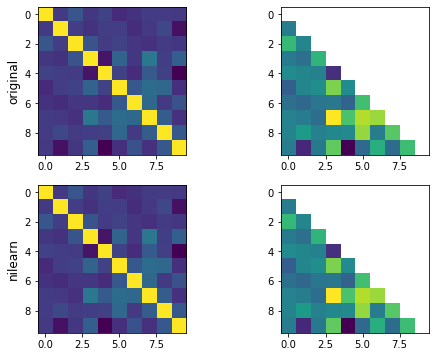

In [20]:
# plot both
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(8, 6))
ax[0][0].set_ylabel('original', fontsize='large')
ax[0][0].imshow(fcm)
ax[0][1].imshow(lower_tri_fcm)
ax[1][0].set_ylabel('nilearn', fontsize='large')
ax[1][0].imshow(fcm_nilearn)
ax[1][1].imshow(lower_tri_fcm_nilearn)